# FIFA 21 Analysis 

### Data Cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/MTres/OneDrive/Desktop/FIFA 21 Project/fifa21_raw_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   photoUrl          18979 non-null  object
 1   LongName          18979 non-null  object
 2   playerUrl         18979 non-null  object
 3   Nationality       18979 non-null  object
 4   Positions         18979 non-null  object
 5   Name              18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Team & Contract   18979 non-null  object
 10  ID                18979 non-null  int64 
 11  Height            18979 non-null  object
 12  Weight            18979 non-null  object
 13  foot              18979 non-null  object
 14  BOV               18979 non-null  int64 
 15  BP                18979 non-null  object
 16  Growth            18979 non-null  int64 
 17  Joined      

C:\Users\MTres\AppData\Local\Temp\ipykernel_14324\501707715.py:1: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/MTres/OneDrive/Desktop/FIFA 21 Project/fifa21_raw_data.csv")


In [3]:
#Eliminating some useless columns
columns_to_drop = ['Release Clause','playerUrl','photoUrl','Loan Date End','LongName' ]
df = df.drop(columns = columns_to_drop)
#Changing OVA name
df = df.rename(columns={'↓OVA': 'OVA'})

df

,Nationality,Positions,Name,Age,OVA,POT,Team & Contract,ID,Height,Weight,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,Argentina,RW ST CF,L. Messi,33,93,93,\n\n\n\nFC Barcelona\n2004 ~ 2021\n\n,158023,"5'7""",159lbs,...,Medium,Low,5 ★,85,92,91,95,38,65,\n372
1,Portugal,ST LW,Cristiano Ronaldo,35,92,92,\n\n\n\nJuventus\n2018 ~ 2022\n\n,20801,"6'2""",183lbs,...,High,Low,5 ★,89,93,81,89,35,77,\n344
2,Slovenia,GK,J. Oblak,27,91,93,\n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n,200389,"6'2""",192lbs,...,Medium,Medium,3 ★,87,92,78,90,52,90,\n86
3,Belgium,CAM CM,K. De Bruyne,29,91,91,\n\n\n\nManchester City\n2015 ~ 2023\n\n,192985,"5'11""",154lbs,...,High,High,4 ★,76,86,93,88,64,78,\n163
4,Brazil,LW CAM,Neymar Jr,28,91,91,\n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n,190871,"5'9""",150lbs,...,High,Medium,5 ★,91,85,86,94,36,59,\n273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,China PR,CB,Zhang Mengxuan,21,47,52,\n\n\n\nChongqing Dangdai Lifan FC SWM Team\n2...,257710,"5'10""",154lbs,...,Low,Low,1 ★,58,23,26,27,50,48,2
18975,England,ST,V. Da Silva,17,47,67,\n\n\n\nOldham Athletic\n2020 ~ 2021\n\n,258736,"5'7""",128lbs,...,Medium,Medium,1 ★,70,46,40,53,16,40,3
18976,China PR,CB,Xia Ao,21,47,55,\n\n\n\nWuhan Zall\n2018 ~ 2022\n\n,247223,"5'10""",146lbs,...,Medium,Medium,1 ★,64,28,26,38,48,51,3
18977,England,CM,B. Hough,17,47,67,\n\n\n\nOldham Athletic\n2020 ~ 2021\n\n,258760,"5'9""",143lbs,...,Medium,Medium,1 ★,64,40,48,49,35,45,5


In [4]:
# Cleaning format and some error in hits
df['Hits'] = df['Hits'].apply(lambda x: int(str(x).replace('K', '00').replace('.', '')) if pd.notnull(x) else None)
#Dividing Team and Contract Lenght by creating two new columns
def parse_team_and_contract(x):
    team = x[:-11]
    contract_duration = x[-11:] if x[-11:].startswith("2") else "0"
    return team, contract_duration

df['Team & Contract'] = df['Team & Contract'].str.replace('\n', '')
df['Team'], df['Contract Duration'] = zip(*df['Team & Contract'].apply(parse_team_and_contract))
df = df.drop(columns=['Team & Contract'])
df

,Nationality,Positions,Name,Age,OVA,POT,ID,Height,Weight,foot,...,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Team,Contract Duration
0,Argentina,RW ST CF,L. Messi,33,93,93,158023,"5'7""",159lbs,Left,...,5 ★,85,92,91,95,38,65,372,FC Barcelona,2004 ~ 2021
1,Portugal,ST LW,Cristiano Ronaldo,35,92,92,20801,"6'2""",183lbs,Right,...,5 ★,89,93,81,89,35,77,344,Juventus,2018 ~ 2022
2,Slovenia,GK,J. Oblak,27,91,93,200389,"6'2""",192lbs,Right,...,3 ★,87,92,78,90,52,90,86,Atlético Madrid,2014 ~ 2023
3,Belgium,CAM CM,K. De Bruyne,29,91,91,192985,"5'11""",154lbs,Right,...,4 ★,76,86,93,88,64,78,163,Manchester City,2015 ~ 2023
4,Brazil,LW CAM,Neymar Jr,28,91,91,190871,"5'9""",150lbs,Right,...,5 ★,91,85,86,94,36,59,273,Paris Saint-Germain,2017 ~ 2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,China PR,CB,Zhang Mengxuan,21,47,52,257710,"5'10""",154lbs,Right,...,1 ★,58,23,26,27,50,48,2,Chongqing Dangdai Lifan FC SWM Team,2020 ~ 2020
18975,England,ST,V. Da Silva,17,47,67,258736,"5'7""",128lbs,Right,...,1 ★,70,46,40,53,16,40,3,Oldham Athletic,2020 ~ 2021
18976,China PR,CB,Xia Ao,21,47,55,247223,"5'10""",146lbs,Right,...,1 ★,64,28,26,38,48,51,3,Wuhan Zall,2018 ~ 2022
18977,England,CM,B. Hough,17,47,67,258760,"5'9""",143lbs,Right,...,1 ★,64,40,48,49,35,45,5,Oldham Athletic,2020 ~ 2021


In [5]:
#Now we change Contract Columns in Contract starts e Contract End
df[['Contract Start', 'Contract End']] = df['Contract Duration'].str.split('~', expand=True)

df['Contract Start'] = df['Contract Start'].str.strip()
df['Contract End'] = df['Contract End'].str.strip()
df = df.drop(columns=['Contract Duration'])

df

,Nationality,Positions,Name,Age,OVA,POT,ID,Height,Weight,foot,...,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Team,Contract Start,Contract End
0,Argentina,RW ST CF,L. Messi,33,93,93,158023,"5'7""",159lbs,Left,...,85,92,91,95,38,65,372,FC Barcelona,2004,2021
1,Portugal,ST LW,Cristiano Ronaldo,35,92,92,20801,"6'2""",183lbs,Right,...,89,93,81,89,35,77,344,Juventus,2018,2022
2,Slovenia,GK,J. Oblak,27,91,93,200389,"6'2""",192lbs,Right,...,87,92,78,90,52,90,86,Atlético Madrid,2014,2023
3,Belgium,CAM CM,K. De Bruyne,29,91,91,192985,"5'11""",154lbs,Right,...,76,86,93,88,64,78,163,Manchester City,2015,2023
4,Brazil,LW CAM,Neymar Jr,28,91,91,190871,"5'9""",150lbs,Right,...,91,85,86,94,36,59,273,Paris Saint-Germain,2017,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,China PR,CB,Zhang Mengxuan,21,47,52,257710,"5'10""",154lbs,Right,...,58,23,26,27,50,48,2,Chongqing Dangdai Lifan FC SWM Team,2020,2020
18975,England,ST,V. Da Silva,17,47,67,258736,"5'7""",128lbs,Right,...,70,46,40,53,16,40,3,Oldham Athletic,2020,2021
18976,China PR,CB,Xia Ao,21,47,55,247223,"5'10""",146lbs,Right,...,64,28,26,38,48,51,3,Wuhan Zall,2018,2022
18977,England,CM,B. Hough,17,47,67,258760,"5'9""",143lbs,Right,...,64,40,48,49,35,45,5,Oldham Athletic,2020,2021


In [6]:
#Changing the Positions columns to make easier analysis 
def sort_positions(positions):
    return ' '.join(sorted(positions.split(" ")))

df['Positions'] = df['Positions'].apply(sort_positions).astype(object)
print(df['Positions'].unique())


#Changing the format of Joined to let it be more understandable for people that use a D/M/Y format
print (df['Joined'])
df['Joined'] = pd.to_datetime(df['Joined'])
df['Joined'] = df['Joined'].dt.strftime('%d/%m/%Y')

df

['CF RW ST' 'LW ST' 'GK' 'CAM CM' 'CAM LW' 'ST' 'LW RW ST' 'RW' 'LW' 'CB'
 'CDM' 'CF ST' 'CDM CM' 'CDM RB' 'CAM CF' 'LW RW' 'CM' 'CAM LM RM' 'RB'
 'CAM CM RW' 'LB' 'CF' 'CF LM' 'CF LW ST' 'CAM RM RW' 'CAM CF ST'
 'CAM CF RM' 'LM ST' 'CAM CDM CM' 'LM' 'CAM RW' 'CB CDM' 'LM RM RW'
 'RM RW' 'CAM CF LW' 'CAM CF CM' 'CF LW' 'CM LM RM' 'LB LM' 'CAM CM RM'
 'LM LW RM' 'CM LB LM' 'CM RM' 'CAM CM LW' 'CB LB' 'RB RM' 'RW ST'
 'LM LW RW' 'LB RB' 'RM' 'CAM RM' 'RB RWB' 'CB CDM CM' 'CAM RM ST' 'LM RM'
 'LM LWB' 'CF RM ST' 'CF RM RW' 'CF LM RM' 'CF RM' 'CM RB' 'CAM LW RW'
 'CAM CM LM' 'CM RM ST' 'CDM CM RB' 'CAM ST' 'RM ST' 'CB LB LWB'
 'CAM LW ST' 'RM RWB' 'CB CDM LB' 'LM LW' 'LW RM RW' 'CM LM' 'LB LM RM'
 'LW RM ST' 'CAM CM ST' 'LB LWB' 'CB RB' 'RM RW ST' 'LWB' 'CAM LM' 'CAM'
 'RB RM RW' 'CF LM LW' 'CAM LM LW' 'CB RB RWB' 'CM LW ST' 'LM LW ST'
 'RB RM RWB' 'CB LB RB' 'LB LM LWB' 'CDM CM LM' 'CM RB RM' 'CAM RW ST'
 'CM LB RB' 'RB RW' 'CF CM' 'CF LW RW' 'LM RM ST' 'RW RWB' 'CAM LM ST'
 'CM LW' 'LB R

,Nationality,Positions,Name,Age,OVA,POT,ID,Height,Weight,foot,...,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Team,Contract Start,Contract End
0,Argentina,CF RW ST,L. Messi,33,93,93,158023,"5'7""",159lbs,Left,...,85,92,91,95,38,65,372,FC Barcelona,2004,2021
1,Portugal,LW ST,Cristiano Ronaldo,35,92,92,20801,"6'2""",183lbs,Right,...,89,93,81,89,35,77,344,Juventus,2018,2022
2,Slovenia,GK,J. Oblak,27,91,93,200389,"6'2""",192lbs,Right,...,87,92,78,90,52,90,86,Atlético Madrid,2014,2023
3,Belgium,CAM CM,K. De Bruyne,29,91,91,192985,"5'11""",154lbs,Right,...,76,86,93,88,64,78,163,Manchester City,2015,2023
4,Brazil,CAM LW,Neymar Jr,28,91,91,190871,"5'9""",150lbs,Right,...,91,85,86,94,36,59,273,Paris Saint-Germain,2017,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,China PR,CB,Zhang Mengxuan,21,47,52,257710,"5'10""",154lbs,Right,...,58,23,26,27,50,48,2,Chongqing Dangdai Lifan FC SWM Team,2020,2020
18975,England,ST,V. Da Silva,17,47,67,258736,"5'7""",128lbs,Right,...,70,46,40,53,16,40,3,Oldham Athletic,2020,2021
18976,China PR,CB,Xia Ao,21,47,55,247223,"5'10""",146lbs,Right,...,64,28,26,38,48,51,3,Wuhan Zall,2018,2022
18977,England,CM,B. Hough,17,47,67,258760,"5'9""",143lbs,Right,...,64,40,48,49,35,45,5,Oldham Athletic,2020,2021


In [7]:
#Now we change the Value column format and it's name
def parse_value(value):
    value = value.replace('€', '')
    
    if 'M' in value:
        value = value.replace('M', '')
        value = float(value)
    elif 'K' in value:
        value = value.replace('K', '')
        value = float(value) / 1000  # Convert 'K' to 'M'
    else:
        value = float(value) / 1000000  # If no 'K' or 'M', assuming the value is in euro
    
    return value

df['Value'] = df['Value'].apply(parse_value)
df = df.rename(columns={'Value': 'Value (in M)'})

In [8]:
#Now we do the same thing for the wage 
def parse_wage(wage):
    wage = wage.replace('€', '')
    
    if 'M' in wage:
        wage = wage.replace('M', '')
        wage = float(wage) * 1000  # Convert 'M' to 'K'
    elif 'K' in wage:
        wage = wage.replace('K', '')
        wage = float(wage)
    else:
        wage = float(wage) / 1000  # If no 'K' or 'M', assuming the value is in euro and convert it to 'K'
    
    return wage

df['Wage'] = df['Wage'].apply(parse_wage)
df = df.rename(columns={'Wage': 'Wage (in K)'})

df

,Nationality,Positions,Name,Age,OVA,POT,ID,Height,Weight,foot,...,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Team,Contract Start,Contract End
0,Argentina,CF RW ST,L. Messi,33,93,93,158023,"5'7""",159lbs,Left,...,85,92,91,95,38,65,372,FC Barcelona,2004,2021
1,Portugal,LW ST,Cristiano Ronaldo,35,92,92,20801,"6'2""",183lbs,Right,...,89,93,81,89,35,77,344,Juventus,2018,2022
2,Slovenia,GK,J. Oblak,27,91,93,200389,"6'2""",192lbs,Right,...,87,92,78,90,52,90,86,Atlético Madrid,2014,2023
3,Belgium,CAM CM,K. De Bruyne,29,91,91,192985,"5'11""",154lbs,Right,...,76,86,93,88,64,78,163,Manchester City,2015,2023
4,Brazil,CAM LW,Neymar Jr,28,91,91,190871,"5'9""",150lbs,Right,...,91,85,86,94,36,59,273,Paris Saint-Germain,2017,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,China PR,CB,Zhang Mengxuan,21,47,52,257710,"5'10""",154lbs,Right,...,58,23,26,27,50,48,2,Chongqing Dangdai Lifan FC SWM Team,2020,2020
18975,England,ST,V. Da Silva,17,47,67,258736,"5'7""",128lbs,Right,...,70,46,40,53,16,40,3,Oldham Athletic,2020,2021
18976,China PR,CB,Xia Ao,21,47,55,247223,"5'10""",146lbs,Right,...,64,28,26,38,48,51,3,Wuhan Zall,2018,2022
18977,England,CM,B. Hough,17,47,67,258760,"5'9""",143lbs,Right,...,64,40,48,49,35,45,5,Oldham Athletic,2020,2021


In [9]:
#To conclude we can now change Height and Weight format
def convert_height(height):
    height = height.replace('"', '').split("'")
    return int(height[0]) * 12 + int(height[1])

df['Height'] = df['Height'].apply(convert_height)

def convert_weight(weight):
    return int(weight.replace('lbs', ''))

df['Weight'] = df['Weight'].apply(convert_weight)

df = df.rename(columns={'Height': 'Height (in CM)'})
df = df.rename(columns={'Weight': 'Weight (in KG)'})

df

,Nationality,Positions,Name,Age,OVA,POT,ID,Height (in CM),Weight (in KG),foot,...,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Team,Contract Start,Contract End
0,Argentina,CF RW ST,L. Messi,33,93,93,158023,67,159,Left,...,85,92,91,95,38,65,372,FC Barcelona,2004,2021
1,Portugal,LW ST,Cristiano Ronaldo,35,92,92,20801,74,183,Right,...,89,93,81,89,35,77,344,Juventus,2018,2022
2,Slovenia,GK,J. Oblak,27,91,93,200389,74,192,Right,...,87,92,78,90,52,90,86,Atlético Madrid,2014,2023
3,Belgium,CAM CM,K. De Bruyne,29,91,91,192985,71,154,Right,...,76,86,93,88,64,78,163,Manchester City,2015,2023
4,Brazil,CAM LW,Neymar Jr,28,91,91,190871,69,150,Right,...,91,85,86,94,36,59,273,Paris Saint-Germain,2017,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,China PR,CB,Zhang Mengxuan,21,47,52,257710,70,154,Right,...,58,23,26,27,50,48,2,Chongqing Dangdai Lifan FC SWM Team,2020,2020
18975,England,ST,V. Da Silva,17,47,67,258736,67,128,Right,...,70,46,40,53,16,40,3,Oldham Athletic,2020,2021
18976,China PR,CB,Xia Ao,21,47,55,247223,70,146,Right,...,64,28,26,38,48,51,3,Wuhan Zall,2018,2022
18977,England,CM,B. Hough,17,47,67,258760,69,143,Right,...,64,40,48,49,35,45,5,Oldham Athletic,2020,2021


## Data Visualization

### We will now make graphs to analyze the market value and wage of the players. Specifically for both of these features we are going to make two subplots: 
### 1. In the first plot we will put the players in order by their Overall Score on FIFA (Value that indicates the strength of a player from 1 to 100)
### 2. In the second plot we will put the players in order by their Market Value/wage



In [10]:
# Checking if that those values are numeric
df['OVA'] = pd.to_numeric(df['OVA'], errors='coerce')
df['Wage (in K)'] = pd.to_numeric(df['Wage (in K)'], errors='coerce')
df['Value (in M)'] = pd.to_numeric(df['Value (in M)'], errors='coerce')

In [11]:
# Need to sort the players by OVA and select top 15 
top_players_OVA = df.sort_values('OVA', ascending=False).head(15)
top_players_value = df.sort_values('Value (in M)', ascending=False).head(15)
top_players_wage = df.sort_values('Wage (in K)', ascending=False).head(15)

In [12]:
#Setting the color palete
colors_OVA = sns.color_palette('coolwarm', n_colors=100)[::7][:len(top_players_OVA)][::-1]
colors_wage = sns.color_palette('coolwarm', n_colors=100)[::7][:len(top_players_wage)][::-1]
colors_value = sns.color_palette('coolwarm', n_colors=100)[::7][:len(top_players_value)][::-1]

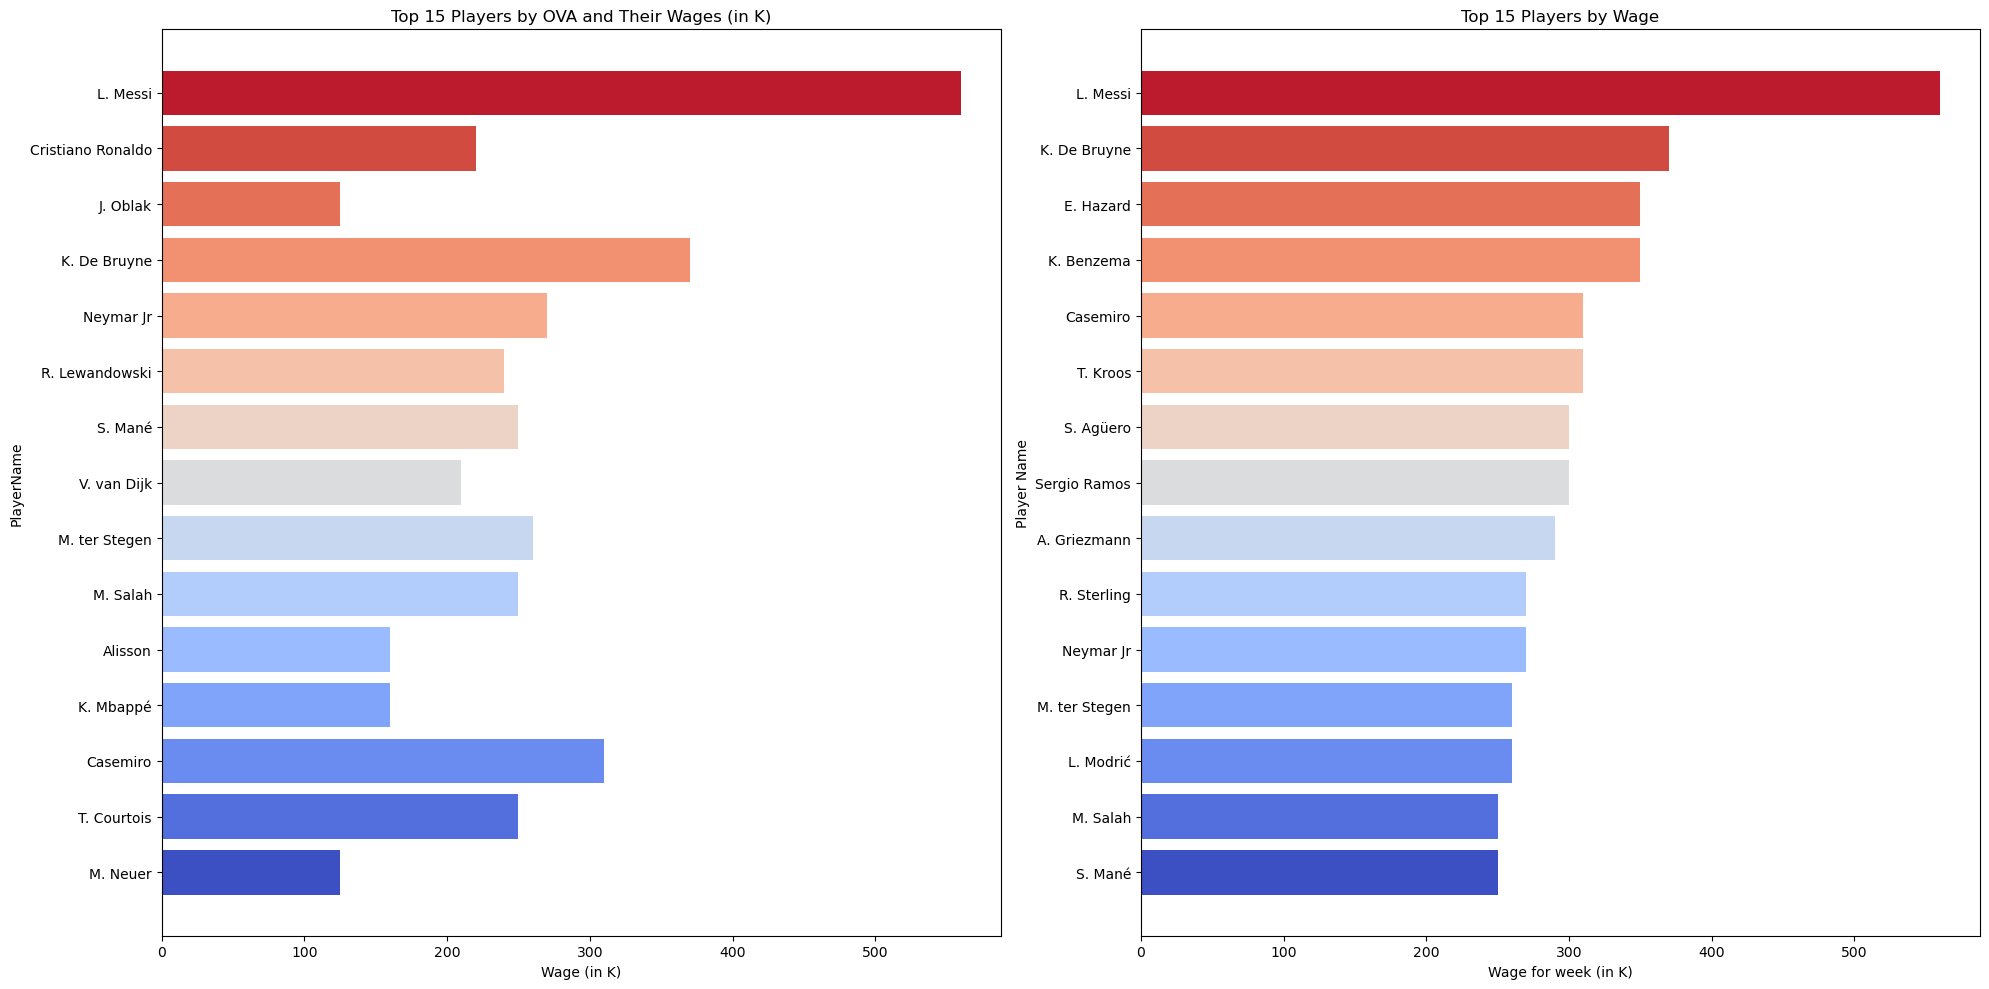

In [13]:
# Now we can create the subplots and the graphs
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# sPlot n1
ax[0].barh(top_players_OVA['Name'], top_players_OVA['Wage (in K)'], color=colors_OVA)
ax[0].set_xlabel('Wage (in K)')
ax[0].set_ylabel('PlayerName')
ax[0].set_title('Top 15 Players by OVA and Their Wages (in K)')
ax[0].invert_yaxis()

# sPlot m2
ax[1].barh(top_players_wage['Name'], top_players_wage['Wage (in K)'], color=colors_wage)
ax[1].set_xlabel('Wage for week (in K)')
ax[1].set_ylabel('Player Name')
ax[1].set_title('Top 15 Players by Wage')
ax[1].invert_yaxis()

plt.tight_layout()
plt.show()



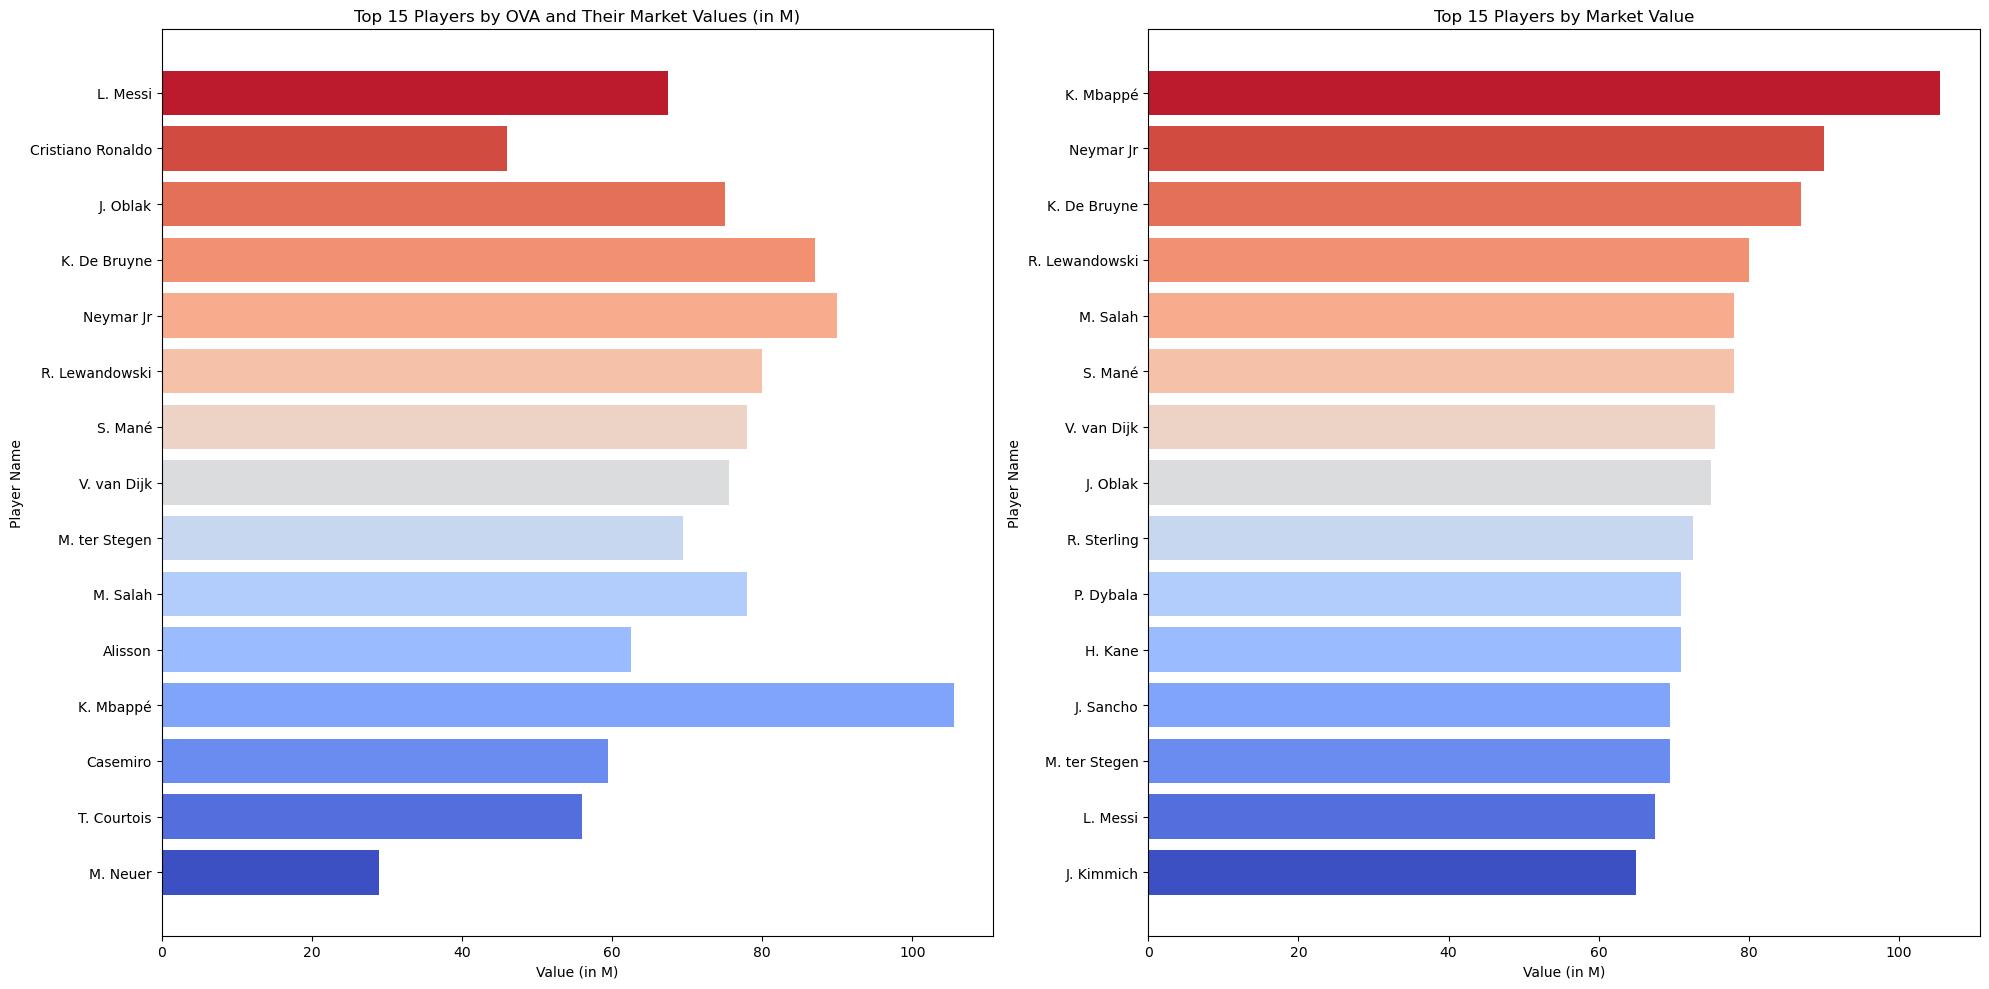

In [14]:
#Now we just need to do the same thing but for the Market values
fig, ax = plt.subplots(1, 2, figsize=(20, 10))


ax[0].barh(top_players_OVA['Name'], top_players_OVA['Value (in M)'], color=colors_OVA)
ax[0].set_xlabel('Value (in M)')
ax[0].set_ylabel('Player Name')
ax[0].set_title('Top 15 Players by OVA and Their Market Values (in M)')
ax[0].invert_yaxis()

ax[1].barh(top_players_value['Name'], top_players_value['Value (in M)'], color=colors_value)
ax[1].set_xlabel('Value (in M)')
ax[1].set_ylabel('Player Name')
ax[1].set_title('Top 15 Players by Market Value')
ax[1].invert_yaxis()

plt.tight_layout()
plt.show()

### Now we're gonna create a two Radar Plot to analyze the characteristic of all the best 100 players.
### I'm gonna do five different Radar Plot, one for the GK, one for the Defender, one for the Midfielder, one for the Attackers and one for all the movement players (so GK are excluded)

### GOALKEEPER

In [15]:
goalkeepers = ['GK']
df_goalkeepers = df[df['Positions'].isin(goalkeepers)]
top_goalkeepers = df_goalkeepers.sort_values('OVA', ascending=False).head(100)

In [16]:
def plot_radar_chart(name1, name2):
    
    player1 = top_goalkeepers[top_goalkeepers['Name'] == name1]
    player2 = top_goalkeepers[top_goalkeepers['Name'] == name2]
    categories = ['GK Diving', 'GK Handling', 'GK Positioning', 'GK Reflexes', 'GK Kicking', 'Jumping']
    
    values1 = player1[categories].values.flatten().tolist()
    values2 = player2[categories].values.flatten().tolist()

    num_vars = len(categories)
    angles = [n / float(num_vars) * 2 * np.pi for n in range(num_vars)]
    angles += angles[:1]
    values1 += values1[:1]
    values2 += values2[:1]

    # Now we can create the plot
    plt.figure(figsize=(6, 6), dpi=80)
    plt.polar(angles, values1, color='green', label=name1)
    plt.fill(angles, values1, color='green', alpha=0.25)
    plt.polar(angles, values2, color='blue', label=name2)
    plt.fill(angles, values2, color='blue', alpha=0.25)
    plt.thetagrids(np.degrees(angles[:-1]), labels=categories)

    plt.title(name1 + ' vs ' + name2)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
    plt.show()


dropdown1 = widgets.Dropdown(
    options=top_goalkeepers['Name'].values.tolist(),
    value=top_goalkeepers['Name'].values[0],
    description='Player 1:',
    disabled=False,
)

dropdown2 = widgets.Dropdown(
    options=top_goalkeepers['Name'].values.tolist(),
    value=top_goalkeepers['Name'].values[1],
    description='Player 2:',
    disabled=False,
)

widgets.interact(plot_radar_chart, name1=dropdown1, name2=dropdown2)


interactive(children=(Dropdown(description='Player 1:', options=('J. Oblak', 'M. ter Stegen', 'Alisson', 'T. C…

<function __main__.plot_radar_chart(name1, name2)>

### DEFENDERS

In [17]:
# Creating a dataframe for all the movement players
df_movement_players = df[~df['Positions'].str.contains("GK")]



In [18]:
defender_positions = ['LB', 'RB', 'RWB', 'LWB', 'CB']
df_defenders = df_movement_players[df_movement_players['Positions'].isin(defender_positions)]
top_defenders = df_defenders.sort_values('OVA', ascending=False).head(100)

In [19]:
# Now we can start by creating the Radar Plot
def plot_radar_chart(name1, name2):
    
    player1 = top_defenders[top_defenders['Name'] == name1]
    player2 = top_defenders[top_defenders['Name'] == name2]
    categories = ['Marking', 'Strength', 'Stamina', 'Aggression', 'Interceptions', 'Sliding Tackle']
    values1 = player1[categories].values.flatten().tolist()
    values2 = player2[categories].values.flatten().tolist()

    
    num_vars = len(categories)
    angles = [n / float(num_vars) * 2 * np.pi for n in range(num_vars)]
    angles += angles[:1]
    values1 += values1[:1]
    values2 += values2[:1]

    # Now we can create the plot
    plt.figure(figsize=(6, 6), dpi=80)
    plt.polar(angles, values1, color='green', label=name1)
    plt.fill(angles, values1, color='green', alpha=0.25)
    plt.polar(angles, values2, color='blue', label=name2)
    plt.fill(angles, values2, color='blue', alpha=0.25)
    plt.thetagrids(np.degrees(angles[:-1]), labels=categories)

    plt.title(name1 + ' vs ' + name2)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
    plt.show()
    

dropdown1 = widgets.Dropdown(
    options=top_defenders['Name'].values.tolist(),
    value=top_defenders['Name'].values[0],
    description='Player 1:',
    disabled=False,
)

dropdown2 = widgets.Dropdown(
    options=top_defenders['Name'].values.tolist(),
    value=top_defenders['Name'].values[1],
    description='Player 2:',
    disabled=False,
)

widgets.interact(plot_radar_chart, name1=dropdown1, name2=dropdown2)



interactive(children=(Dropdown(description='Player 1:', options=('V. van Dijk', 'Sergio Ramos', 'K. Koulibaly'…

<function __main__.plot_radar_chart(name1, name2)>

### MIDFIELDERS

In [20]:
midfielders_positions = ['CDM', 'CM', 'CAM', 'LM', 'RM']
df_midfielders = df_movement_players[df_movement_players['Positions'].isin(midfielders_positions)]
top_midfielders = df_midfielders.sort_values('OVA', ascending=False).head(100)

In [21]:
# Now we can start by creating the Radar Plot
def plot_radar_chart(name1, name2):
    
    player1 = top_midfielders[top_midfielders['Name'] == name1]
    player2 = top_midfielders[top_midfielders['Name'] == name2]
    categories = ['Short Passing', 'Dribbling', 'Long Passing', 'Ball Control', 'Interceptions', 'Vision']
    values1 = player1[categories].values.flatten().tolist()
    values2 = player2[categories].values.flatten().tolist()

    
    num_vars = len(categories)
    angles = [n / float(num_vars) * 2 * np.pi for n in range(num_vars)]
    angles += angles[:1]
    values1 += values1[:1]
    values2 += values2[:1]

    # Now we can create the plot
    plt.figure(figsize=(6, 6), dpi=80)
    plt.polar(angles, values1, color='green', label=name1)
    plt.fill(angles, values1, color='green', alpha=0.25)
    plt.polar(angles, values2, color='blue', label=name2)
    plt.fill(angles, values2, color='blue', alpha=0.25)
    plt.thetagrids(np.degrees(angles[:-1]), labels=categories)

    plt.title(name1 + ' vs ' + name2)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
    plt.show()

    
dropdown1 = widgets.Dropdown(
    options=top_midfielders['Name'].values.tolist(),
    value=top_midfielders['Name'].values[0],
    description='Player 1:',
    disabled=False,
)

dropdown2 = widgets.Dropdown(
    options=top_midfielders['Name'].values.tolist(),
    value=top_midfielders['Name'].values[1],
    description='Player 2:',
    disabled=False,
)

widgets.interact(plot_radar_chart, name1=dropdown1, name2=dropdown2)


interactive(children=(Dropdown(description='Player 1:', options=('Casemiro', 'T. Kroos', 'Fabinho', 'L. Modrić…

<function __main__.plot_radar_chart(name1, name2)>

### ATTACKERS

In [22]:
attackers_positions = ['RW', 'LW', 'CF', 'ST']
df_attackers = df_movement_players[df_movement_players['Positions'].isin(attackers_positions)]
top_attackers = df_attackers.sort_values('OVA', ascending=False).head(100)

In [23]:
def plot_radar_chart(name1, name2):
    
    player1 = top_attackers[top_attackers['Name'] == name1]
    player2 = top_attackers[top_attackers['Name'] == name2]
    categories = ['Finishing', 'Dribbling', 'Acceleration', 'Heading Accuracy', 'Shot Power', 'Strength']
    values1 = player1[categories].values.flatten().tolist()
    values2 = player2[categories].values.flatten().tolist()

    
    num_vars = len(categories)
    angles = [n / float(num_vars) * 2 * np.pi for n in range(num_vars)]
    angles += angles[:1]
    values1 += values1[:1]
    values2 += values2[:1]

    # Now we can create the plot
    plt.figure(figsize=(6, 6), dpi=80)
    plt.polar(angles, values1, color='green', label=name1)
    plt.fill(angles, values1, color='green', alpha=0.25)
    plt.polar(angles, values2, color='blue', label=name2)
    plt.fill(angles, values2, color='blue', alpha=0.25)
    plt.thetagrids(np.degrees(angles[:-1]), labels=categories)

    plt.title(name1 + ' vs ' + name2)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
    plt.show()

    
dropdown1 = widgets.Dropdown(
    options=top_attackers['Name'].values.tolist(),
    value=top_attackers['Name'].values[0],
    description='Player 1:',
    disabled=False,
)

dropdown2 = widgets.Dropdown(
    options=top_attackers['Name'].values.tolist(),
    value=top_attackers['Name'].values[1],
    description='Player 2:',
    disabled=False,
)

widgets.interact(plot_radar_chart, name1=dropdown1, name2=dropdown2)


interactive(children=(Dropdown(description='Player 1:', options=('R. Lewandowski', 'S. Mané', 'M. Salah', 'S. …

<function __main__.plot_radar_chart(name1, name2)>

### MOVEMENT PLAYERS

In [24]:
top_movement_players = df_movement_players.sort_values('OVA', ascending=False).head(50)

In [25]:
def plot_radar_chart(name1, name2):
    
    player1 = top_movement_players[top_movement_players['Name'] == name1]
    player2 = top_movement_players[top_movement_players['Name'] == name2]
    categories = ['Acceleration', 'Strength', 'Stamina', 'Agility', 'Sprint Speed', 'Reactions']
    values1 = player1[categories].values.flatten().tolist()
    values2 = player2[categories].values.flatten().tolist()

    num_vars = len(categories)
    angles = [n / float(num_vars) * 2 * np.pi for n in range(num_vars)]
    angles += angles[:1]
    values1 += values1[:1]
    values2 += values2[:1]

    # Now we can create the plot
    plt.figure(figsize=(6, 6), dpi=80)
    plt.polar(angles, values1, color='green', label=name1)
    plt.fill(angles, values1, color='green', alpha=0.25)
    plt.polar(angles, values2, color='blue', label=name2)
    plt.fill(angles, values2, color='blue', alpha=0.25)
    plt.thetagrids(np.degrees(angles[:-1]), labels=categories)

    plt.title(name1 + ' vs ' + name2)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
    plt.show()


dropdown1 = widgets.Dropdown(
    options=top_movement_players['Name'].values.tolist(),
    value=top_movement_players['Name'].values[0],
    description='Player 1:',
    disabled=False,
)

dropdown2 = widgets.Dropdown(
    options=top_movement_players['Name'].values.tolist(),
    value=top_movement_players['Name'].values[1],
    description='Player 2:',
    disabled=False,
)

widgets.interact(plot_radar_chart, name1=dropdown1, name2=dropdown2)


interactive(children=(Dropdown(description='Player 1:', options=('L. Messi', 'Cristiano Ronaldo', 'K. De Bruyn…

<function __main__.plot_radar_chart(name1, name2)>

### Player Stats Distribution

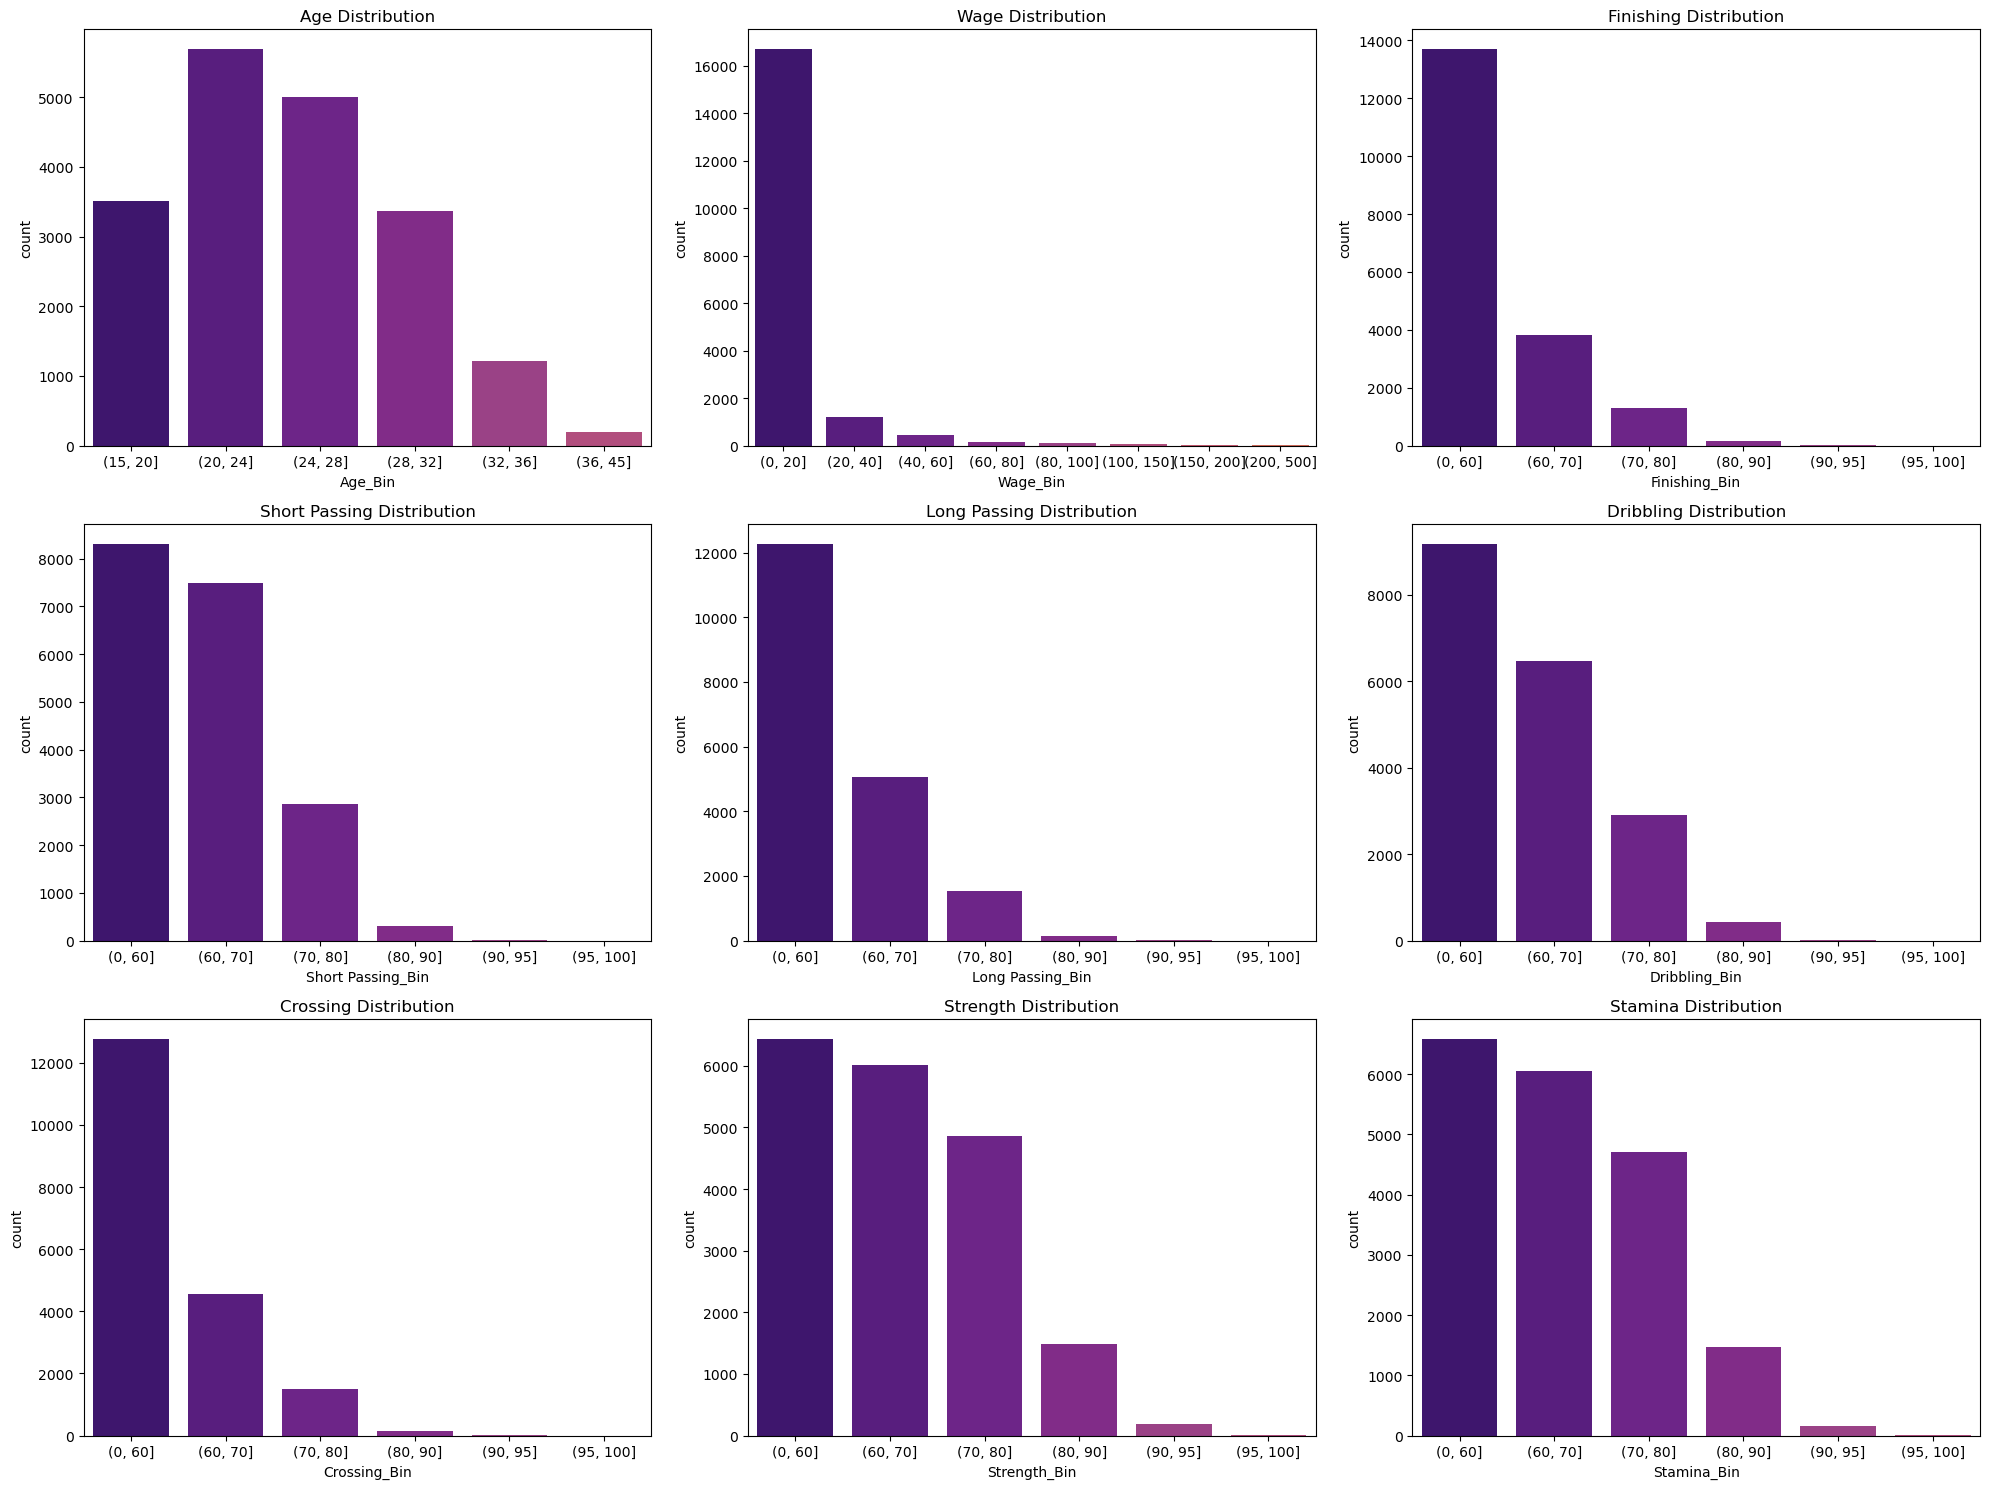

In [26]:
#We need to create some bins for the analysis
age_bins = [15, 20, 24, 28, 32, 36, 45] # 100 come valore massimo per includere tutti gli over 36
wage_bins = [0, 20, 40, 60, 80, 100, 150, 200, 500] # 1000 come valore massimo per includere tutti gli over 200
other_bins = [0, 60, 70, 80, 90, 95, 100] # 100 come valore massimo per includere tutti gli over 95

df['Age_Bin'] = pd.cut(df['Age'], bins=age_bins)
df['Wage_Bin'] = pd.cut(df['Wage (in K)'], bins=wage_bins)
for column in ['Finishing', 'Short Passing', 'Long Passing', 'Dribbling', 'Crossing', 'Strength', 'Stamina']:
    df[column + '_Bin'] = pd.cut(df[column], bins=other_bins)

#Now i create the subplots and the graphs
fig, axs = plt.subplots(3, 3, figsize=(20, 15))
palette = ['#3d087b', '#5b0e8e', '#751499', '#8e1d97', '#a9338e', '#c13d7d', '#d94866', '#e85f49', '#f0742d', '#f68f19']

sns.countplot(x='Age_Bin', data=df, ax=axs[0, 0], palette=palette)
axs[0, 0].set_title('Age Distribution')
sns.countplot(x='Wage_Bin', data=df, ax=axs[0, 1], palette=palette)
axs[0, 1].set_title('Wage Distribution')
features = ['Finishing', 'Short Passing', 'Long Passing', 'Dribbling', 'Crossing', 'Strength', 'Stamina']
for i, feature in enumerate(features):
    row = (i + 2) // 3
    col = (i + 2) % 3
    sns.countplot(x=feature + '_Bin', data=df, ax=axs[row, col], palette=palette)
    axs[row, col].set_title(feature + ' Distribution')

plt.tight_layout()
plt.show()




## Players Market Price Analysis

### Now we're gonna analyze the Players Market Price by considering some characteristics that can provide insights into the factors that contribute the most to a player's market value.

In [27]:
selected_columns = ['Age', 'POT', 'Wage (in K)', 'Finishing', 'Short Passing', 'Long Passing', 'Dribbling', 'Crossing', 'Strength', 'Stamina', 'Value (in M)']
df_selected = df[selected_columns]
correlation = df[selected_columns].corr()['Value (in M)'].sort_values(ascending=False)
correlation = correlation.drop('Value (in M)')
print(correlation)


Wage (in K)      0.848038
POT              0.568367
Short Passing    0.329705
Long Passing     0.310762
Dribbling        0.269176
Crossing         0.259656
Finishing        0.242665
Stamina          0.226771
Strength         0.145238
Age              0.086808
Name: Value (in M), dtype: float64


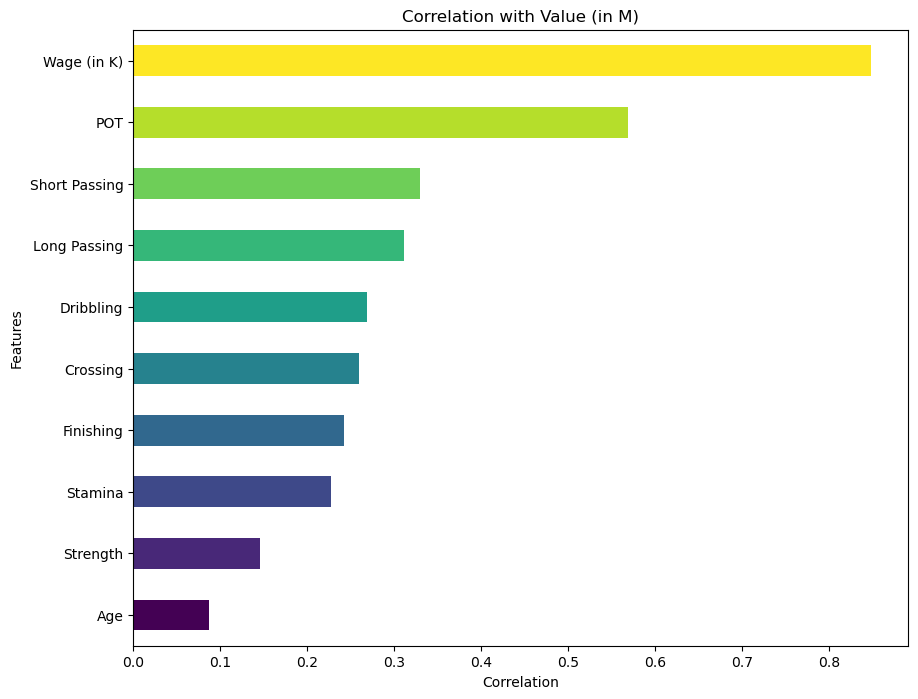

In [28]:
plt.figure(figsize=(10, 8))
sorted_correlation = correlation.sort_values(ascending=True)
colors = plt.cm.viridis(np.linspace(0, 1, len(correlation)))
sorted_correlation.plot(kind='barh', color=colors)
plt.title('Correlation with Value (in M)')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.show()
